In [1]:
from collections import OrderedDict
import swmmAPI as swmm
import mbc

SWMM Input File

In [2]:
swmmINP = 'NoWestside_withISDs_RainEvents_Simplifying.inp'
# swmmINP = 'NoWestside_withISDs_RainEvents_NoControl1.inp'
simNotes = ['3 Markets for CC and FV, 20160928']

In [3]:
# With or without control?
control = True

In [4]:
# Convert datum?
offset = -479.755 # To Detroit datum

Save Your Shit

In [5]:
pickleOut = 'FV_integration_59.p'
metaCSV = 'CC_FV_FREUD_meta.csv'

Read Control Points from CSV files
CSV files are the files that should be changed

In [6]:
cF = 'input_files/ControlPoints_Init_FV.csv'
uF = 'input_files/Upstream_Init_FV.csv'
dF = 'input_files/Downstream_Init_FV.csv'
pF = 'input_files/PerformancePoints_Init.csv' # Elements of interest in SWMM to analyze performance

controlDict = swmm.return_inputs(cF,'control')
upstreamDict = swmm.return_inputs(uF,'upstream')
downstreamDict = swmm.return_inputs(dF,'downstream')
performanceDict = swmm.return_inputs(pF,'performance')
dsKeys = list(downstreamDict.keys())

Process swmm elements into a dictionary. Just provide the input file str and the swmm input section headers.

In [7]:
headers = ['[TITLE]','[OPTIONS]','[EVAPORATION]','[RAINGAGES]','[SUBCATCHMENTS]',
           '[SUBAREAS]','[INFILTRATION]','[JUNCTIONS]','[OUTFALLS]','[STORAGE]','[CONDUITS]',
           '[PUMPS]','[ORIFICES]','[WEIRS]','[XSECTIONS]','[LOSSES]','[CONTROLS]','[INFLOWS]',
           '[DWF]','[HYDROGRAPHS]','[RDII]','[CURVES]','[TIMESERIES]','[PATTERNS]','[REPORT]',
           '[TAGS]','[MAP]','[COORDINATES]','[VERTICES]','[POLYGONS]','[SYMBOLS]','[PROFILES]']

sections = swmm.make_sections(swmmINP,headers)
conduitDict,junctionDict,storageDict,subcatchmentDict,outfallDict,orificeDict,curvesDict,pumpDict,optionsDict,raingauges,timeseries,evaporation,infiltration,losses,controls,inflows = swmm.prep_dicts(sections)


Get depth and flow information from swmm element dictionaries

In [8]:
swmm.get_depth(upstreamDict,conduitDict,storageDict)
swmm.get_depth(downstreamDict,conduitDict,storageDict)
swmm.get_q_full_and_other(downstreamDict,conduitDict,storageDict,junctionDict)
swmm.orifice_xsect_grab(controlDict,orificeDict)
swmm.pump_curve_grab(controlDict,pumpDict)

timestep = optionsDict['ROUTING_STEP']

swmm.performance_elements(
    performanceDict,
    conduitDict,
    junctionDict,
    storageDict,
    subcatchmentDict,
    outfallDict,
    orificeDict
)

dsKeys = list(downstreamDict.keys())

2909


Variable Management

In [9]:
try:
    del conduitDict
    del junctionDict
    del storageDict
    del subcatchmentDict
    del outfallDict
    del orificeDict
    del curvesDict
    del pumpDict
    del optionsDict
    del sections
except:
    pass

In [10]:
print('Upstream: ', upstreamDict.keys())
print('Downstream: ', downstreamDict.keys())
print('Control: ', controlDict.keys())

Upstream:  odict_keys(['17311', '5220', '5010', '2909', '1700'])
Downstream:  odict_keys(['2909', '1715', '1686'])
Control:  odict_keys(['ORIFICE33@17312-17313', 'PUMP44@5220-5219', 'PUMP34@5010-5009', 'PUMP33@5010-5005', 'PUMP38@2909-5007', 'PUMP13@1700-1695'])


In [11]:
# print(upstreamDict['5220']['max_depth'])
print(downstreamDict['1715']['set_point'])

9


In [12]:
# MARKET 1
upstreamDict['17311']['uparam'] = 1.0
upstreamDict['5220']['uparam'] = 1.0
upstreamDict['5010']['uparam'] = 1.0
upstreamDict['17311']['beta'] = 10.0
upstreamDict['5220']['beta'] = 10.0
upstreamDict['5010']['beta'] = 10.0

# Flooding above depth wet well depth of 65 ft. Make 60 ft the "max depth" of element for modeling purposes.
upstreamDict['5220']['max_depth'] = 60.0

downstreamDict['2909']['max_depth'] = 20.0
downstreamDict['2909']['set_point'] = 0.8
downstreamDict['2909']['epsilon'] = 5.0
downstreamDict['2909']['gamma'] = 0.0

# MARKET 2
upstreamDict['2909']['uparam'] = 5.0
upstreamDict['2909']['max_depth'] = 20.0
upstreamDict['5010']['uparam'] = 5.0
upstreamDict['5010']['max_depth'] = 50.0

downstreamDict['1715']['epsilon'] = 2.5
downstreamDict['1715']['set_point'] = 1.0

# MARKET 3
upstreamDict['1700']['uparam'] = 10.0

downstreamDict['1686']['gamma'] = 1.0
downstreamDict['1686']['epsilon'] = 0.0
downstreamDict['1686']['set_point'] = 1.0


In [13]:
%%time
price, PDemaexnd = mbc.run_control_sim(control,controlDict,upstreamDict,downstreamDict,dsKeys,swmmINP,performanceDict,timestep,offset)

running simulation...
2909 current el:  95.00532613864618 flood el:  95
2909 current el:  95.04065042143361 flood el:  95
2909 current el:  95.05526716033705 flood el:  95
2909 current el:  95.05202053398 flood el:  95
2909 current el:  95.04312154847776 flood el:  95
2909 current el:  95.03422333865512 flood el:  95
2909 current el:  95.025325904434 flood el:  95
2909 current el:  95.01642924574662 flood el:  95
2909 current el:  95.00753336252546 flood el:  95
2909 current el:  95.00741363755685 flood el:  95
2909 current el:  95.04272779025814 flood el:  95
2909 current el:  95.09332197861374 flood el:  95
2909 current el:  95.14955027303927 flood el:  95
2909 current el:  95.19817596617884 flood el:  95
2909 current el:  95.22629147669466 flood el:  95
2909 current el:  95.22929406094374 flood el:  95
2909 current el:  95.22037962360321 flood el:  95
2909 current el:  95.21146596330095 flood el:  95
2909 current el:  95.20255307994694 flood el:  95
2909 current el:  95.193640973473

# Save That Shit

In [14]:
saveDict = {
    'controlDict':controlDict,
    'upstreamDict':upstreamDict,
    'downstreamDict':downstreamDict,
    'metaCSV':metaCSV,
    'pickleOut':pickleOut,
    'notes':simNotes,
    'file':swmmINP,
    'control':str(control),
    'performanceDict':performanceDict
}

try:
    saveDict['price'] = price
    saveDict['PDemand'] = PDemand
except:
    pass

mbc.save_that_shit(saveDict)

# Visualize That Shit

In [15]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

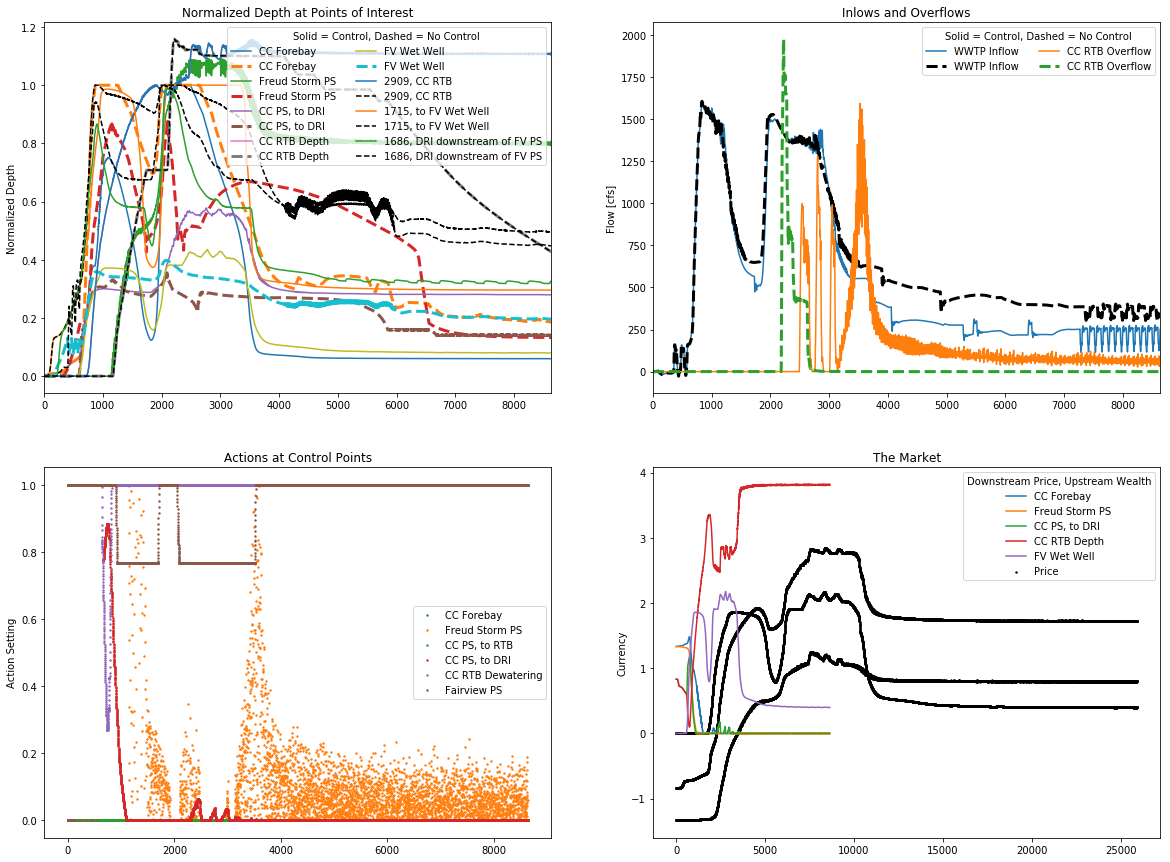

1


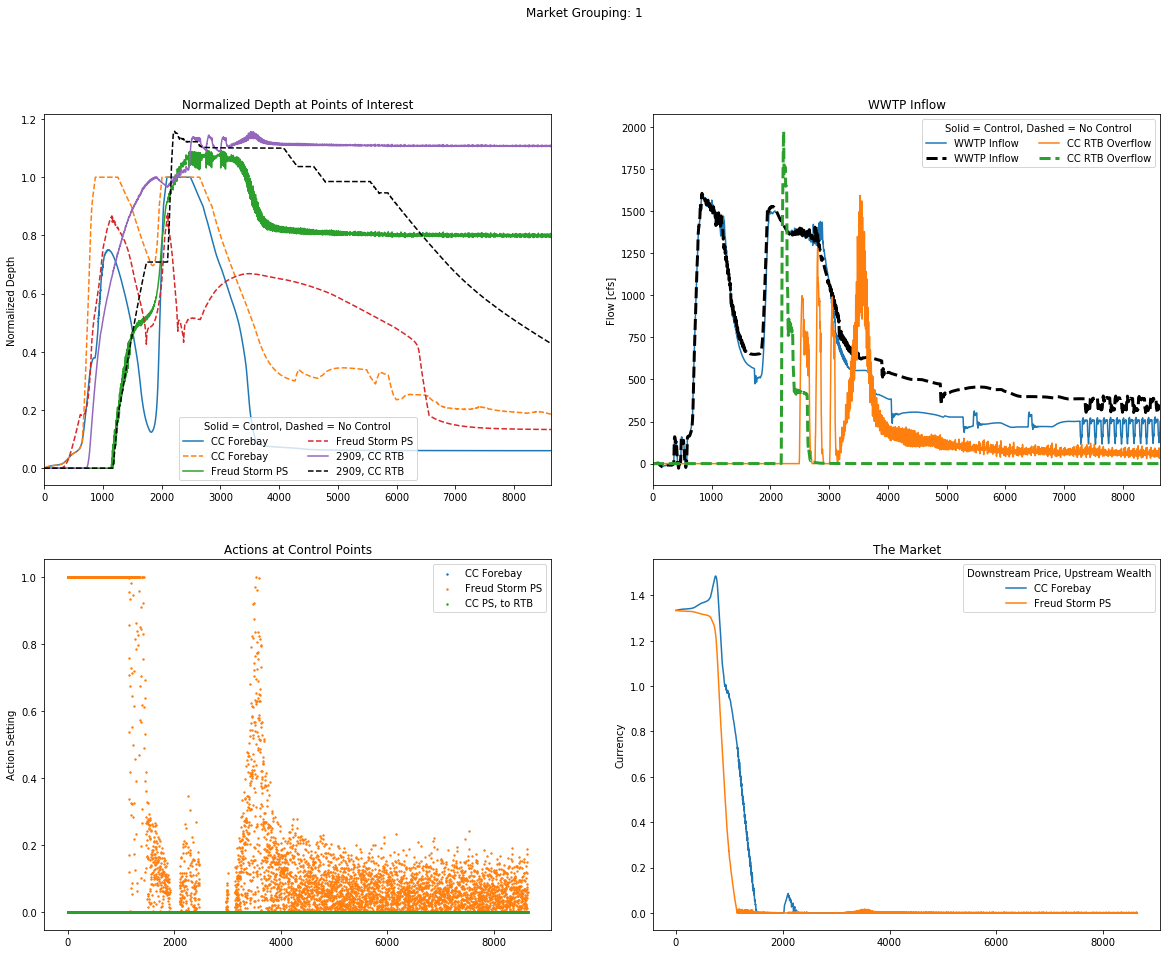

2


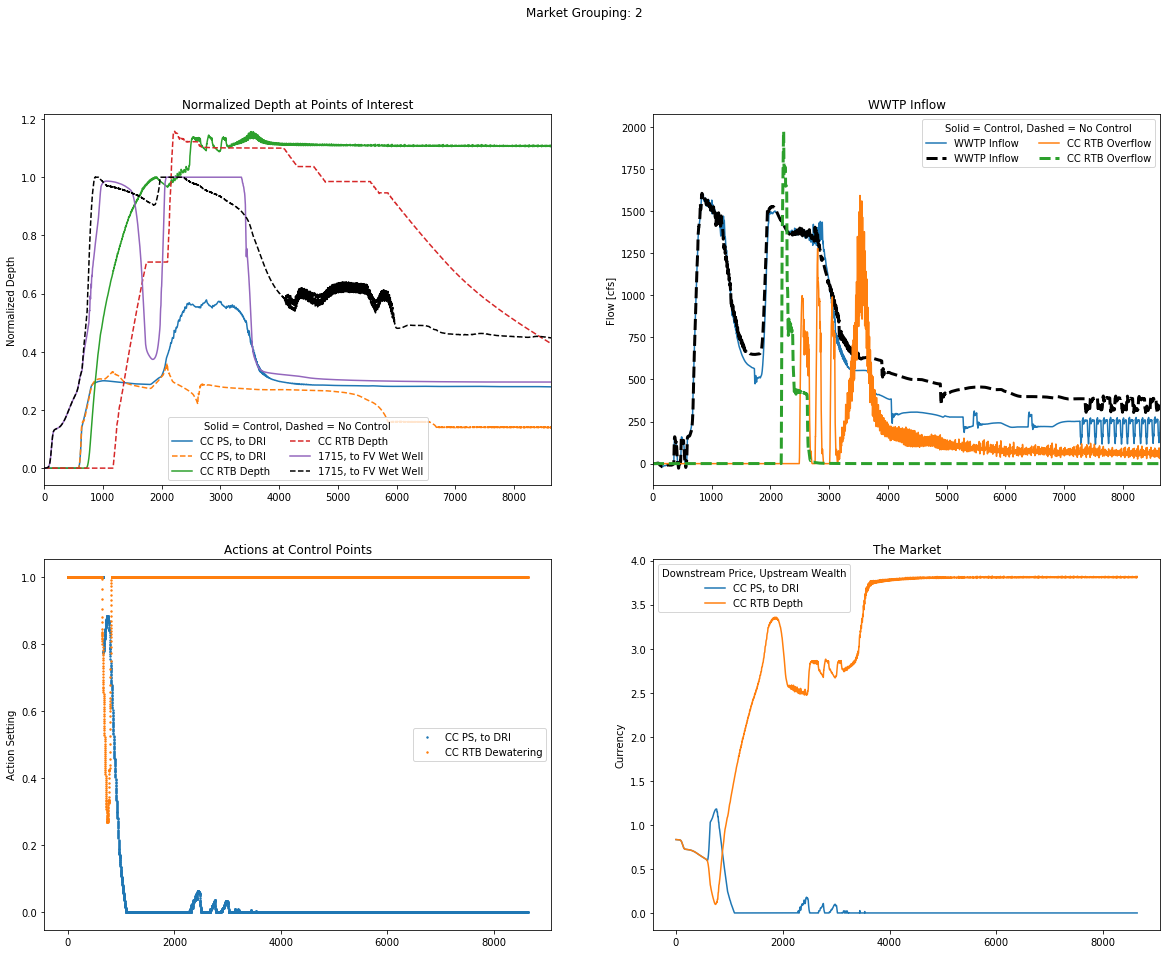

3


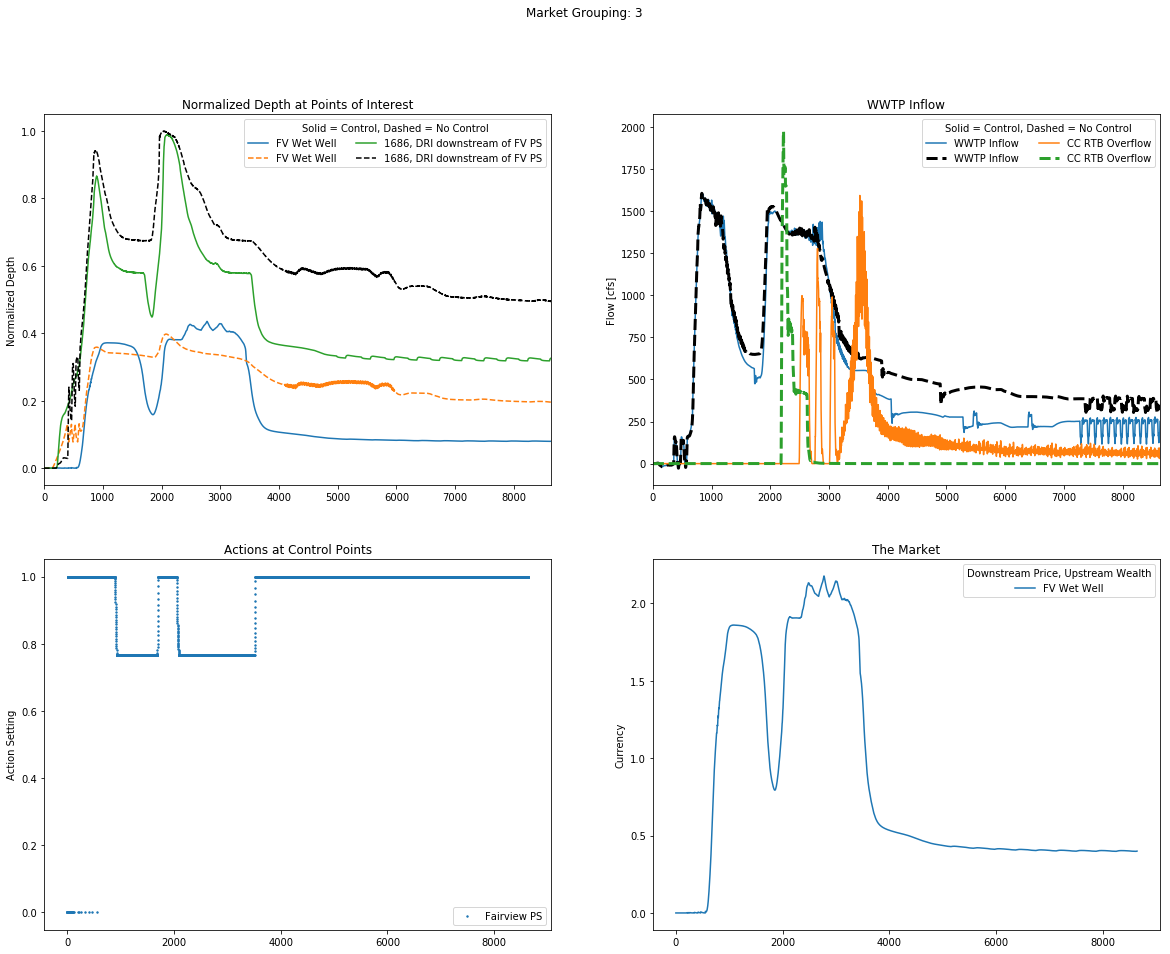

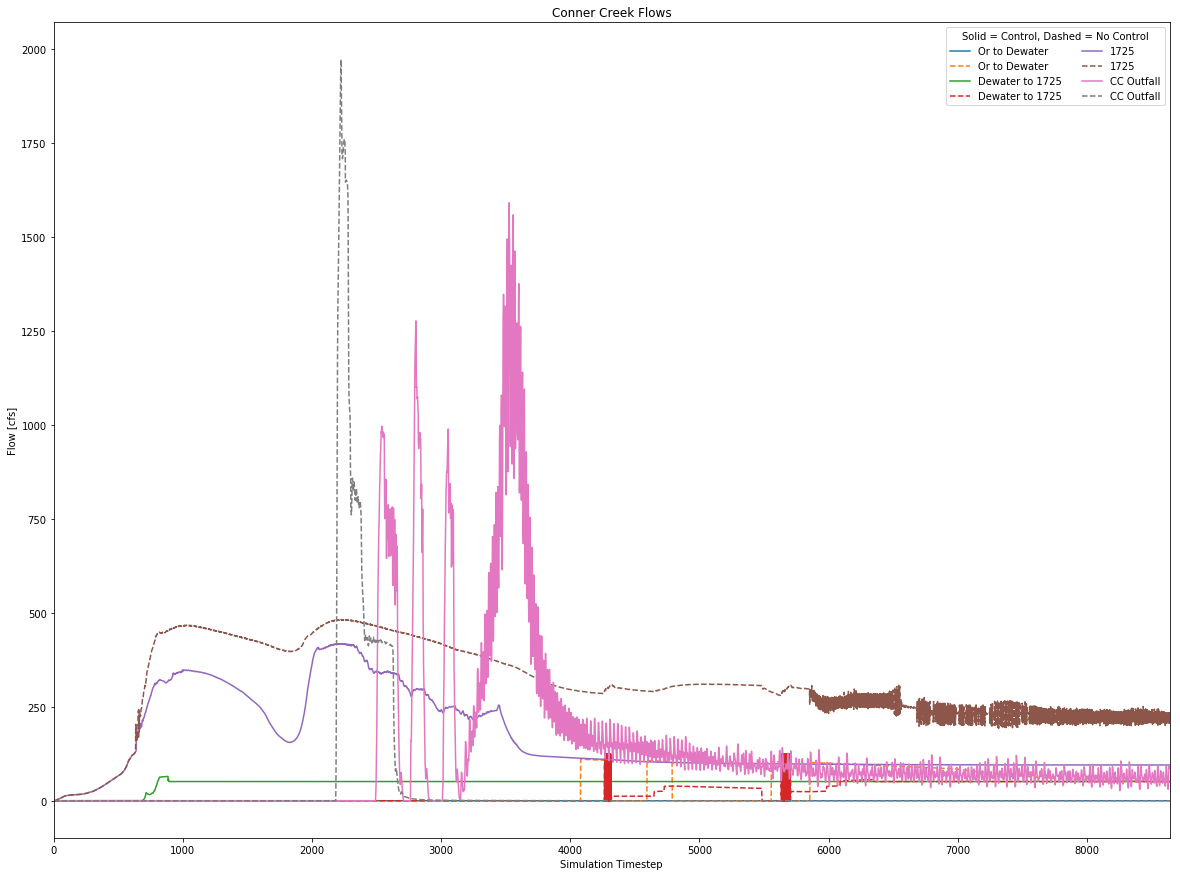

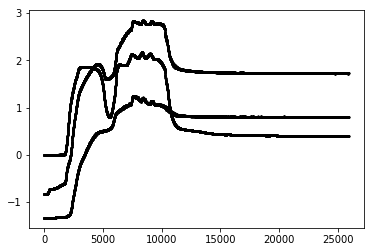

In [16]:
index = [pickleOut]
f_nocontrol =  'FV_20160928_PG021_3_markets_noControl.p'
for fname in index:
    f_control = fname
    figname = fname[:-2]+'.png'
    save = True
    mbc.viz_shit(f_nocontrol,f_control,figname,save,control)

In [17]:
with open(f_control,'rb') as fC, open(f_nocontrol,'rb') as fNC:
    data_control = pickle.load(fC)
    data_nocontrol = pickle.load(fNC)

In [17]:
for ts in timeseries:
    print(ts, max(timeseries[ts]['value']))

10YR1HR 4.200000
20150530_PG002 1.999664
20150530_PG003 2.31961
20150530_PG005 2.089998
20150530_PG008 2.399597
20150530_PG018 2.240051
20150530_PG019 2.29
20150530_PG020 1.910043
20150530_Unnam 2.240051
20160928_PG002 5.391151
20160928_PG003 4.650994
20160928_PG005 0.779869
20160928_PG008 0.0
20160928_PG018 5.030605
20160928_PG019 6.229999
20160928_PG020 5.459083
20160928_PG021 1.289998
20160928_PG022 5.821243
20160928_PG025 3.28
20160928_PG026 4.220097
20160928_PG027 2.110451
20170504_PG002 1.050194
20170504_PG003 0.970207
20170504_PG005 1.080231
20170504_PG008 0.0
20170504_PG018 0.950203
20170504_PG019 1.019997
20170504_PG020 1.000213
20170504_PG021 0.990023
20170504_PG022 1.090233
20170504_PG025 1.04
20170504_PG026 0.019996
20170504_PG027 1.060226
25YR24HR_SCSII 5.720000
INFLOW@4135 00:00
INFLOW@4175 00:00
INFLOW@42702 00:00
INFLOW@4272 00:00
INFLOW@4449 00:00
INFLOW@4450 00:00
INFLOW@4515 00:00
INFLOW@4517 00:00
INFLOW@4990 00:00
INFLOW@7519 00:00
INFLOW@7521 00:00
INFLOW@7829 00:

In [17]:
# plt.scatter([i for i in range(0,len(data_control['price']))],data_control['price'],s=2)
# plt.show()


# plt.figure(figsize=(20,15))

# plt.plot(data_control['performanceDict']['ORIFICE22@2909-2999']['ts_flow'])
# plt.plot(data_nocontrol['performanceDict']['ORIFICE22@2909-2999']['ts_flow'],linestyle='--')

# plt.plot(data_control['performanceDict']['5006']['ts_flow'])
# plt.plot(data_nocontrol['performanceDict']['5006']['ts_flow'],linestyle='--')

# plt.plot(data_control['performanceDict']['1725']['ts_flow'])
# plt.plot(data_nocontrol['performanceDict']['1725']['ts_flow'],linestyle='--')

# plt.plot(data_control['performanceDict']['2908']['ts_flow'])
# plt.plot(data_nocontrol['performanceDict']['2908']['ts_flow'],linestyle='--')


# plt.legend(['Or to Dewater','Or to Dewater',
#             'Dewater to 1725','Dewater to 1725',
#             '1725','1725','CC Outfall','CC Outfall'],
#            title = 'Solid = Control, Dashed = No Control',
#            ncol=2)
# plt.title('Conner Creek Flows')
# plt.xlabel('Simulation Timestep')
# plt.ylabel('Flow [cfs]')
# plt.show()


# groups = max([data_control['controlDict'][i]['group'] for i in data_control['controlDict']])

# for group in range(1,groups+1):
#     print(group)
    
#     C_fill,U_fill,D_fill,dsKeys = mbc.get_group(group,data_control['controlDict'],data_control['upstreamDict'],data_control['downstreamDict'])

#     # keys/model elements for this submarket
#     keys = [C_fill.keys(),U_fill.keys(),D_fill.keys()]
    
#     fig,axarr = plt.subplots(2,2, figsize=(20,15))
    
    
#     # PLOT 1: NORMALIZED DEPTH FOR UPSTREAM AND DOWNSTREAM LOCATIONS  
#     axarr[0,0].set_title('Normalized Depth at Points of Interest')
#     leg = []
#     for U in keys[1]:
#         axarr[0,0].plot(data_control['upstreamDict'][U]['ts'])
#         axarr[0,0].plot(data_nocontrol['upstreamDict'][U]['ts'],linestyle='--')
#         leg = leg + [data_control['upstreamDict'][U]['location'],data_nocontrol['upstreamDict'][U]['location']]
                
#     for D in keys[2]:
#         axarr[0,0].plot(data_control['downstreamDict'][D]['ts_depth'])
#         axarr[0,0].plot(data_nocontrol['downstreamDict'][D]['ts_depth'],color='k',linestyle='--')
#         leg = leg + [data_control['downstreamDict'][D]['location'],data_nocontrol['downstreamDict'][D]['location']]
    
    
#     axarr[0,0].legend(leg,title = 'Solid = Control, Dashed = No Control', ncol=2)
#     axarr[0,0].set_ylabel('Normalized Depth')
    
    
#     # PLOT 2: INFLOWS AND OVERFLOWS
#     axarr[0,1].set_title('Inflows and Overflows')
#     axarr[0,1].plot(data_control['performanceDict']['1002']['ts_flow'])
#     axarr[0,1].plot(data_nocontrol['performanceDict']['1002']['ts_flow'],color='k',linestyle='--',linewidth=3)
#     axarr[0,1].set_title('WWTP Inflow')
#     axarr[0,1].set_ylabel('Flow [cfs]')
    
#     axarr[0,1].plot(data_control['performanceDict']['2908']['ts_flow'])
#     axarr[0,1].plot(data_nocontrol['performanceDict']['2908']['ts_flow'],linestyle='--',linewidth=3)
#     leg = ['WWTP Inflow','WWTP Inflow','CC RTB Overflow','CC RTB Overflow']
#     axarr[0,1].legend(leg,title = 'Solid = Control, Dashed = No Control', ncol=2)
    
    
#     # PLOT 3: ACTIONS AT CONTROL POINTS
#     leg = []
#     t = np.array([i for i in range(0,len(data_control['downstreamDict'][D]['ts_depth']))])
#     if control:
#         for C in keys[0]:
#             axarr[1,0].scatter(t,data_control['controlDict'][C]['actionTS'],s=2)
#             leg = leg + [data_control['controlDict'][C]['location']]
#         axarr[1,0].set_ylabel('Action Setting')
#         axarr[1,0].set_title('Actions at Control Points')
#         axarr[1,0].legend(leg)
    
    
#     # PLOT 4: THE MARKET
#     leg = []
#     for U in keys[1]:
#         axarr[1,1].plot(data_control['upstreamDict'][U]['PD'])
#         leg = leg + [data_control['upstreamDict'][U]['location']]
# #     axarr[1,1].plot(data_control['price'],color = 'k', linewidth = 3)
# #     leg = leg + ['Price']
#     axarr[1,1].legend(leg,title = 'Downstream Price, Upstream Wealth')
#     axarr[1,1].set_ylabel('Currency')
#     axarr[1,1].set_title('The Market')
    
#     fig.suptitle('Market Grouping: '+ str(group))
#     fig.tight_layout
#     plt.show()


# plt.plot(data_nocontrol['performanceDict']['2908']['ts_flow'])
# plt.plot(data_control['performanceDict']['2908']['ts_flow'])
# plt.show()



# import pickle
# import matplotlib.pyplot as plt
# %matplotlib inline

# f_nocontrol = 'FV_integration_noControl.p'
# f_control = pickleOut
# save = False

# with open(f_control,'rb') as fC, open(f_nocontrol,'rb') as fNC:
#     data_control = pickle.load(fC)
#     data_nocontrol = pickle.load(fNC)



# index = []
# for a in range(0,10):
#     for b in range(0,10):
#         index.append('output_files/one_inch_' + str(a) + '_' + str(b) + '.p')




# import matplotlib.pyplot as plt
# %matplotlib inline

# with open(f_control,'rb') as fC, open(f_nocontrol,'rb') as fNC:
#     data_control = pickle.load(fC)
#     data_nocontrol = pickle.load(fNC)



# plt.plot(data_nocontrol['performanceDict']['ORIFICE22@2909-2999']['ts_flow'],linestyle='--')
# plt.plot(data_nocontrol['performanceDict']['5006']['ts_flow'],linestyle='--')
# plt.plot(data_nocontrol['performanceDict']['1725']['ts_flow'],linestyle='--')
# plt.legend(['orifice','link','1725'])
# plt.show()


# plt.plot(performanceDict['1695']['ts_flow'])

# plt.plot(downstreamDict['2909']['ts_depth'])
# plt.plot(upstreamDict['2909']['ts'])


# for i,j in zip(downstreamDict['2909']['ts_depth'],upstreamDict['2909']['ts']):
#     print(i,j)

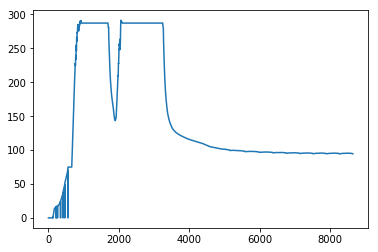

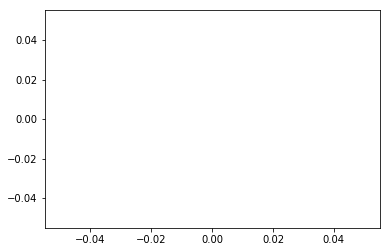

In [21]:
plt.plot(performanceDict['1695']['ts_flow'])
plt.show()

dict_keys(['type', 'DScp', 'measure', 'beta', 'uparam', 'location', 'group', 'flood_el', 'ts', 'PD', 'ts_el', 'max_depth'])